# Kaggle Project: Airline Passenger Satisfaction

- Original dataset: https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction

Authors:
- Wendy Yu: Data Preprocessing, EDA, Decision Tree
- Lee Ko: Random Forest
- Xuefei Wang: Logistic Regression, Model Comparison

The tasks are to:
- Explore what factors of airline services are predictive of passengers' satisfication  <br>
- Build ML models to predict which factors increase passengers' satisfication <br> 
- This is a binary classification task that requires supervised learning

### Problem that needs to be solved rn
-  Debug the rename code in the process of onehotencoder
- Figure out a way to visualize class - 012 variables

In [3]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

## Import Data & Data Overview

In [4]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
train_df.shape, test_df.shape

((103904, 25), (25976, 25))

In [ ]:
train_df.columns 

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [ ]:
train_df.info()
train_df.head()
print("\n----------------------------\n")
test_df.info()
test_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


## Data Preprocessing
In this section, we focus on making the data ready to use for ML models. It includes:
- dropping unused columns
- rearranging data
- filling in missing values

In [ ]:
# Dropping columns that will not be used for future analysis in train.csv
train_df.drop(['Unnamed: 0', 'id'], axis = 1, inplace = True)

# Dropping columns that will not be used for future analysis in test.csv
test_df.drop(['Unnamed: 0', 'id'], axis = 1, inplace = True)

In [ ]:
# Cheking missing data
null_sum = train_df.isnull().sum()
null_sum

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [ ]:
null_sum_test = test_df.isnull().sum()
null_sum_test

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

#### Process numerical data

In [ ]:
num_col = ['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 
           'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment','On-board service',
           'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes','Arrival Delay in Minutes']

In [ ]:
train_df[num_col] = train_df[num_col].astype('float')
train_df[num_col].dtypes

Age                                  float64
Flight Distance                      float64
Inflight wifi service                float64
Departure/Arrival time convenient    float64
Ease of Online booking               float64
Gate location                        float64
Food and drink                       float64
Online boarding                      float64
Seat comfort                         float64
Inflight entertainment               float64
On-board service                     float64
Leg room service                     float64
Baggage handling                     float64
Checkin service                      float64
Inflight service                     float64
Cleanliness                          float64
Departure Delay in Minutes           float64
Arrival Delay in Minutes             float64
dtype: object

In [ ]:
# Filling missing numbers in "Arrival Delay in Minutes" column with the mean of the column for train data
for col in num_col:
    if col == "Arrival Delay in Minutes":
        train_df[col].fillna(value = train_df[col].mean(), inplace=True)
        
# Same process for test data
for col in num_col:
    if col == "Arrival Delay in Minutes":
        test_df[col].fillna(value = test_df[col].mean(), inplace=True)

In [ ]:
# Checking is there any missing numbers after filling missing numbers in the "Arrival Delay in Minutes" column 

train_df.isnull().sum()
print("\n----------------------------\n")
test_df.isnull().sum()


----------------------------



Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [ ]:
# Generating descriptive statistics of each numerical feature
train_df[num_col].describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.640909
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


#### Process catgorical data

In [ ]:
cat_col = ['Gender', 'Customer Type', 'Type of Travel', 'Class','satisfaction']

In [ ]:
train_df[cat_col] = train_df[cat_col].astype('category')
train_df[cat_col].dtypes

Gender            category
Customer Type     category
Type of Travel    category
Class             category
satisfaction      category
dtype: object

##### Satisfaction
A variable indicates passengers' attitude toward the airline

In [ ]:
# Dummy coded Satisfaction for train.csv
train_df.satisfaction = [1 if x == "satisfied" else 0 for x in train_df.satisfaction]

# Dummy coded Satisfaction for test.csv
test_df.satisfaction = [1 if x == "satisfied" else 0 for x in test_df.satisfaction]

##### Gender
Catgorical variable

In [ ]:
# Dummy coded Gender for train.csv
train_df.Gender = [1 if x == 'Female' else 0 for x in train_df.Gender]

# Dummy coded Gender for test.csv
test_df.Gender = [1 if x == 'Female' else 0 for x in test_df.Gender]

##### Customer Type

In [ ]:
# Dummy coded Customer type for train.csv
train_df['Customer Type'] = [1 if x == 'Loyal Customer' else 0 for x in train_df['Customer Type']]

# Same process for test.csv
test_df['Customer Type'] = [1 if x == 'Loyal Customer' else 0 for x in test_df['Customer Type']]

##### Type of Travel

In [ ]:
# Dummy coded Customer type for train.csv
train_df['Type of Travel'] = [1 if x == 'Business travel' else 0 for x in train_df['Type of Travel']]

# Same process for test.csv
test_df['Type of Travel'] = [1 if x == 'Business travel' else 0 for x in test_df['Type of Travel']]

In [ ]:
train_df[cat_col]

,Gender,Customer Type,Type of Travel,Class,satisfaction
0,0,1,0,Eco Plus,0
1,0,0,1,Business,0
2,1,1,1,Business,1
3,1,1,1,Business,0
4,0,1,1,Business,1
...,...,...,...,...,...
103899,1,0,1,Eco,0
103900,0,1,1,Business,1
103901,0,0,1,Business,0
103902,1,0,1,Eco,0


- Encode categorical feature:
> OneHotEncoder

##### Class

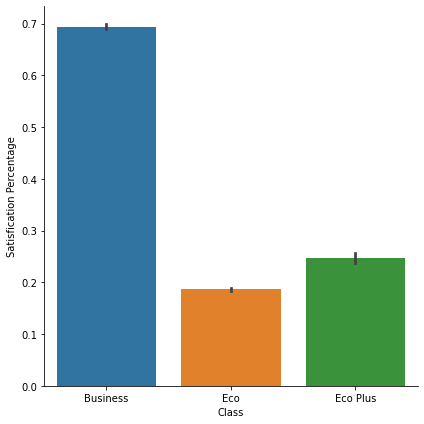

In [ ]:
# Plot 
cla = sns.catplot(x = 'Class', y = 'satisfaction', data = train_df, kind = 'bar', height = 6)
cla.set_ylabels('Satisfication Percentage')

plt.show()
# Using OneHotEncoder for Class 
# creating instance of one-hot-encoder
ohe = OneHotEncoder(handle_unknown='ignore')

# passing class column (label encoded values of bridge_types)
enc_df = pd.DataFrame(ohe.fit_transform(train_df[['Class']]).toarray())

# merge with main df train_df on key values, rename, and drop "Class" column
train_df = train_df.join(enc_df)
train_df.drop(['Class'], axis=1,inplace=True)
train_df.rename(columns={'0': 'Business', '1': 'Eco', '2': 'Eco Plus'},inplace=True)

#
train_df.head()

# Same process for test 
ohe = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(ohe.fit_transform(test_df[['Class']]).toarray())
test_df = test_df.join(enc_df)
test_df.drop(['Class'], axis=1,inplace=True)

In [ ]:
# Generating descriptive statistics of each numerical feature
train_df.describe()

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,0,1,2
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,...,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,0.507459,0.817322,39.379706,0.689627,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,...,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678,0.433333,0.477989,0.449886,0.072124
std,0.499947,0.386404,15.114964,0.462649,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,...,1.180903,1.265396,1.175663,1.312273,38.230901,38.640909,0.495538,0.499518,0.497485,0.258695
min,0.000000,0.000000,7.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,27.000000,0.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,40.000000,1.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,51.000000,1.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,85.000000,1.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000,1.000000,1.000000,1.000000


#### Detection of Outlier

In [ ]:
train_df['Flight Distance'].value_counts() 

337.0     660
594.0     395
404.0     392
862.0     369
2475.0    369
         ... 
656.0       1
1364.0      1
887.0       1
1206.0      1
400.0       1
Name: Flight Distance, Length: 3802, dtype: int64

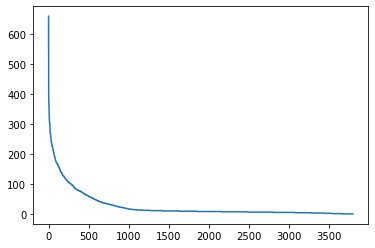

In [ ]:
plt.plot(train_df['Flight Distance'].value_counts().values)

In [ ]:
train_df['Flight Distance'].value_counts().values 

array([660, 395, 392, ...,   1,   1,   1])

In [ ]:
train_df['Departure Delay in Minutes'].value_counts() 

0.0      58668
1.0       2948
2.0       2274
3.0       2009
4.0       1854
         ...  
426.0        1
465.0        1
321.0        1
692.0        1
337.0        1
Name: Departure Delay in Minutes, Length: 446, dtype: int64

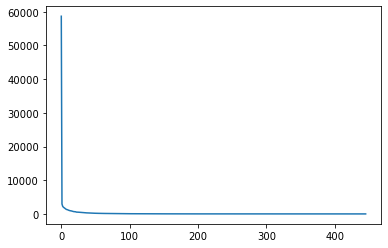

In [ ]:
plt.plot(train_df['Departure Delay in Minutes'].value_counts().values)

In [ ]:
train_df['Departure Delay in Minutes'].value_counts().values

array([58668,  2948,  2274,  2009,  1854,  1692,  1517,  1392,  1295,
        1255,  1147,  1061,  1016,   935,   927,   862,   785,   706,
         694,   667,   645,   630,   544,   540,   529,   512,   488,
         463,   452,   446,   426,   422,   356,   341,   333,   330,
         327,   312,   306,   291,   287,   262,   260,   255,   245,
         239,   221,   220,   216,   200,   200,   194,   180,   178,
         172,   170,   162,   155,   154,   153,   148,   145,   145,
         138,   135,   127,   124,   123,   119,   117,   113,   112,
         110,   106,   104,   102,   101,   101,    92,    88,    88,
          85,    84,    82,    82,    80,    80,    79,    77,    76,
          76,    75,    74,    73,    67,    65,    65,    64,    61,
          59,    57,    56,    56,    54,    52,    52,    52,    52,
          49,    49,    49,    48,    48,    46,    43,    43,    41,
          41,    41,    40,    40,    39,    38,    37,    36,    35,
          34,    34,

In [ ]:
train_df['Arrival Delay in Minutes'].value_counts()

0.0      58159
1.0       2211
2.0       2064
3.0       1952
4.0       1907
         ...  
458.0        1
729.0        1
382.0        1
459.0        1
369.0        1
Name: Arrival Delay in Minutes, Length: 456, dtype: int64

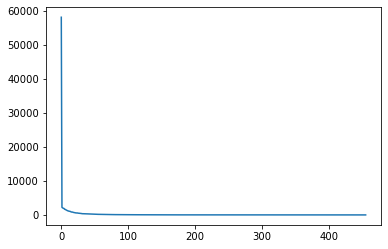

In [ ]:
plt.plot(train_df['Arrival Delay in Minutes'].value_counts().values)

In [ ]:
train_df['Arrival Delay in Minutes'].value_counts().values

array([58159,  2211,  2064,  1952,  1907,  1658,  1616,  1481,  1394,
        1264,  1181,  1129,  1070,  1058,   954,   861,   836,   831,
         742,   699,   650,   645,   582,   576,   575,   524,   508,
         505,   445,   439,   416,   366,   362,   357,   356,   351,
         326,   316,   310,   307,   297,   297,   283,   264,   257,
         230,   230,   227,   205,   205,   201,   198,   198,   195,
         186,   173,   171,   168,   161,   153,   149,   147,   146,
         146,   144,   137,   126,   125,   120,   119,   117,   114,
         113,   111,   108,   103,    95,    94,    93,    91,    88,
          87,    87,    86,    85,    83,    83,    79,    79,    78,
          76,    74,    73,    69,    68,    65,    65,    63,    61,
          61,    61,    59,    59,    58,    57,    57,    54,    53,
          51,    50,    50,    49,    48,    48,    48,    47,    45,
          45,    44,    43,    43,    42,    41,    41,    41,    41,
          40,    40,

In [ ]:
# Detect outliers in the numerical variables that are either larger than the upper_thresh
def outlier_detect(df, features):
    show_outlier = []
    for i in features:
        Q1 = np.percentile(df[i],25)
        Q3 = np.percentile(df[i],75)
        IQR = Q3 - Q1
        lower_thresh = Q1 - 1.5 * IQR
        upper_thresh = Q3 + 1.5 * IQR
        outlier_list = df[(df[i] > upper_thresh)].index
        show_outlier.extend(outlier_list)
        
    show_outlier = Counter(show_outlier)
    return show_outlier

In [ ]:
train_df.loc[outlier_detect(train_df, train_df[num_col])]

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,0,1,2
80,0,1,26.0,1,3960.0,1.0,1.0,1.0,1.0,4.0,...,5.0,4.0,4.0,4.0,45.0,48.0,1,1.0,0.0,0.0
173,0,1,52.0,1,3747.0,5.0,5.0,5.0,5.0,2.0,...,4.0,5.0,4.0,5.0,24.0,20.0,1,1.0,0.0,0.0
201,1,1,43.0,1,3854.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,3.0,0.0,0.0,1,1.0,0.0,0.0
215,1,1,38.0,1,3753.0,2.0,2.0,2.0,2.0,1.0,...,4.0,4.0,4.0,1.0,0.0,0.0,1,1.0,0.0,0.0
379,0,1,46.0,1,3995.0,4.0,4.0,4.0,4.0,3.0,...,5.0,5.0,5.0,4.0,0.0,0.0,1,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103725,1,1,27.0,0,1102.0,3.0,3.0,3.0,3.0,2.0,...,4.0,4.0,3.0,2.0,27.0,61.0,0,0.0,1.0,0.0
103742,1,0,22.0,1,552.0,4.0,0.0,4.0,1.0,1.0,...,4.0,3.0,5.0,1.0,0.0,69.0,0,0.0,1.0,0.0
103750,0,1,52.0,0,476.0,2.0,4.0,2.0,1.0,5.0,...,3.0,3.0,1.0,5.0,25.0,36.0,0,0.0,1.0,0.0
103756,1,1,43.0,1,569.0,2.0,2.0,2.0,2.0,1.0,...,2.0,1.0,2.0,3.0,0.0,44.0,0,0.0,1.0,0.0


Looking at the distribution of the columns and the visualizations of "flight distance" and "Departure/Arrival delay in minutes" columns, the team decided not to drop the outliers because we fear that dropping the outliers in the "Departure/Arrival delay in minutes" columns might result in skewing the data analysis and furthur hampering model performance. 

#### Data Visualization on Catgorical Variables

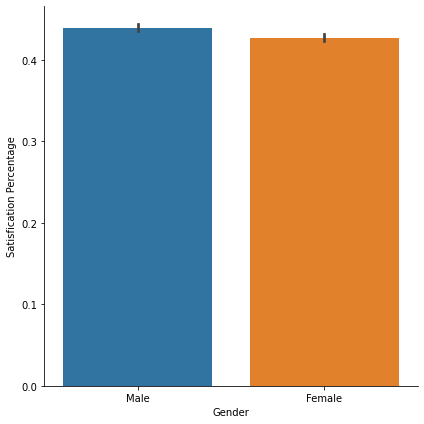

In [ ]:
gender = sns.catplot(x = 'Gender', y = 'satisfaction', data = train_df, kind = 'bar', height = 6)
gender.set_ylabels('Satisfication Percentage')
gender.set_xticklabels(['Male', 'Female'])

plt.show()

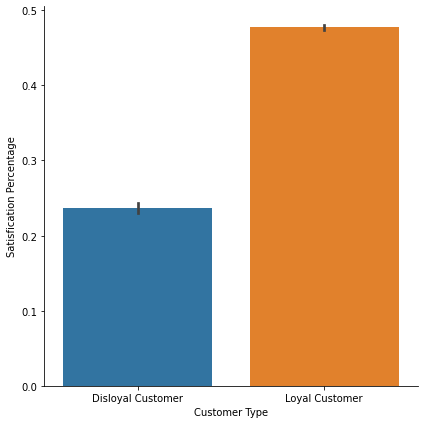

In [ ]:
ct = sns.catplot(x = 'Customer Type', y = 'satisfaction', data = train_df, kind = 'bar', height = 6)
ct.set_ylabels('Satisfication Percentage')
ct.set_xticklabels(['Disloyal Customer', 'Loyal Customer'])

plt.show()

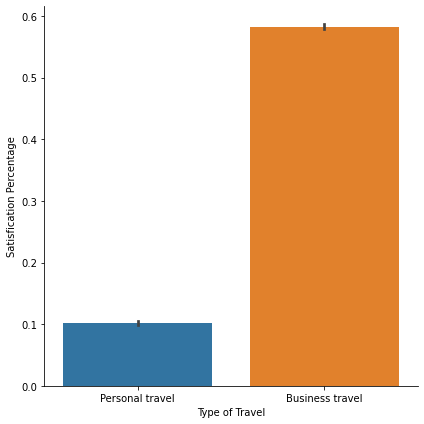

In [ ]:
tot = sns.catplot(x = 'Type of Travel', y = "satisfaction", data = train_df, kind = "bar", height = 6)
tot.set_ylabels('Satisfication Percentage')
tot.set_xticklabels(['Personal travel', 'Business travel'])

plt.show()

#### Data Visualization on Numerical variables

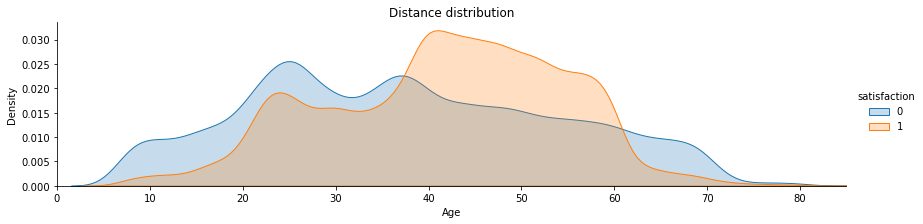

In [ ]:
# Plotting for satisfied and unsatisfied passengers by their age
facet = sns.FacetGrid(train_df, hue='satisfaction',aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train_df['Age'].max()))
facet.set(title='Distance distribution')
facet.add_legend()

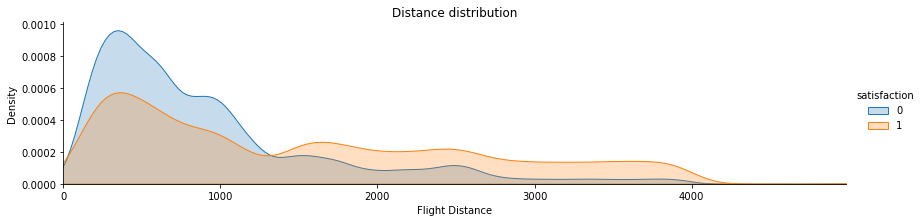

In [ ]:
# Plotting for satisfied and unsatisfied passengers by their flight distance 
facet = sns.FacetGrid(train_df, hue='satisfaction',aspect=4)
facet.map(sns.kdeplot,'Flight Distance',shade= True)
facet.set(xlim=(0, train_df['Flight Distance'].max()))
facet.set(title='Distance distribution')
facet.add_legend()

<AxesSubplot:>

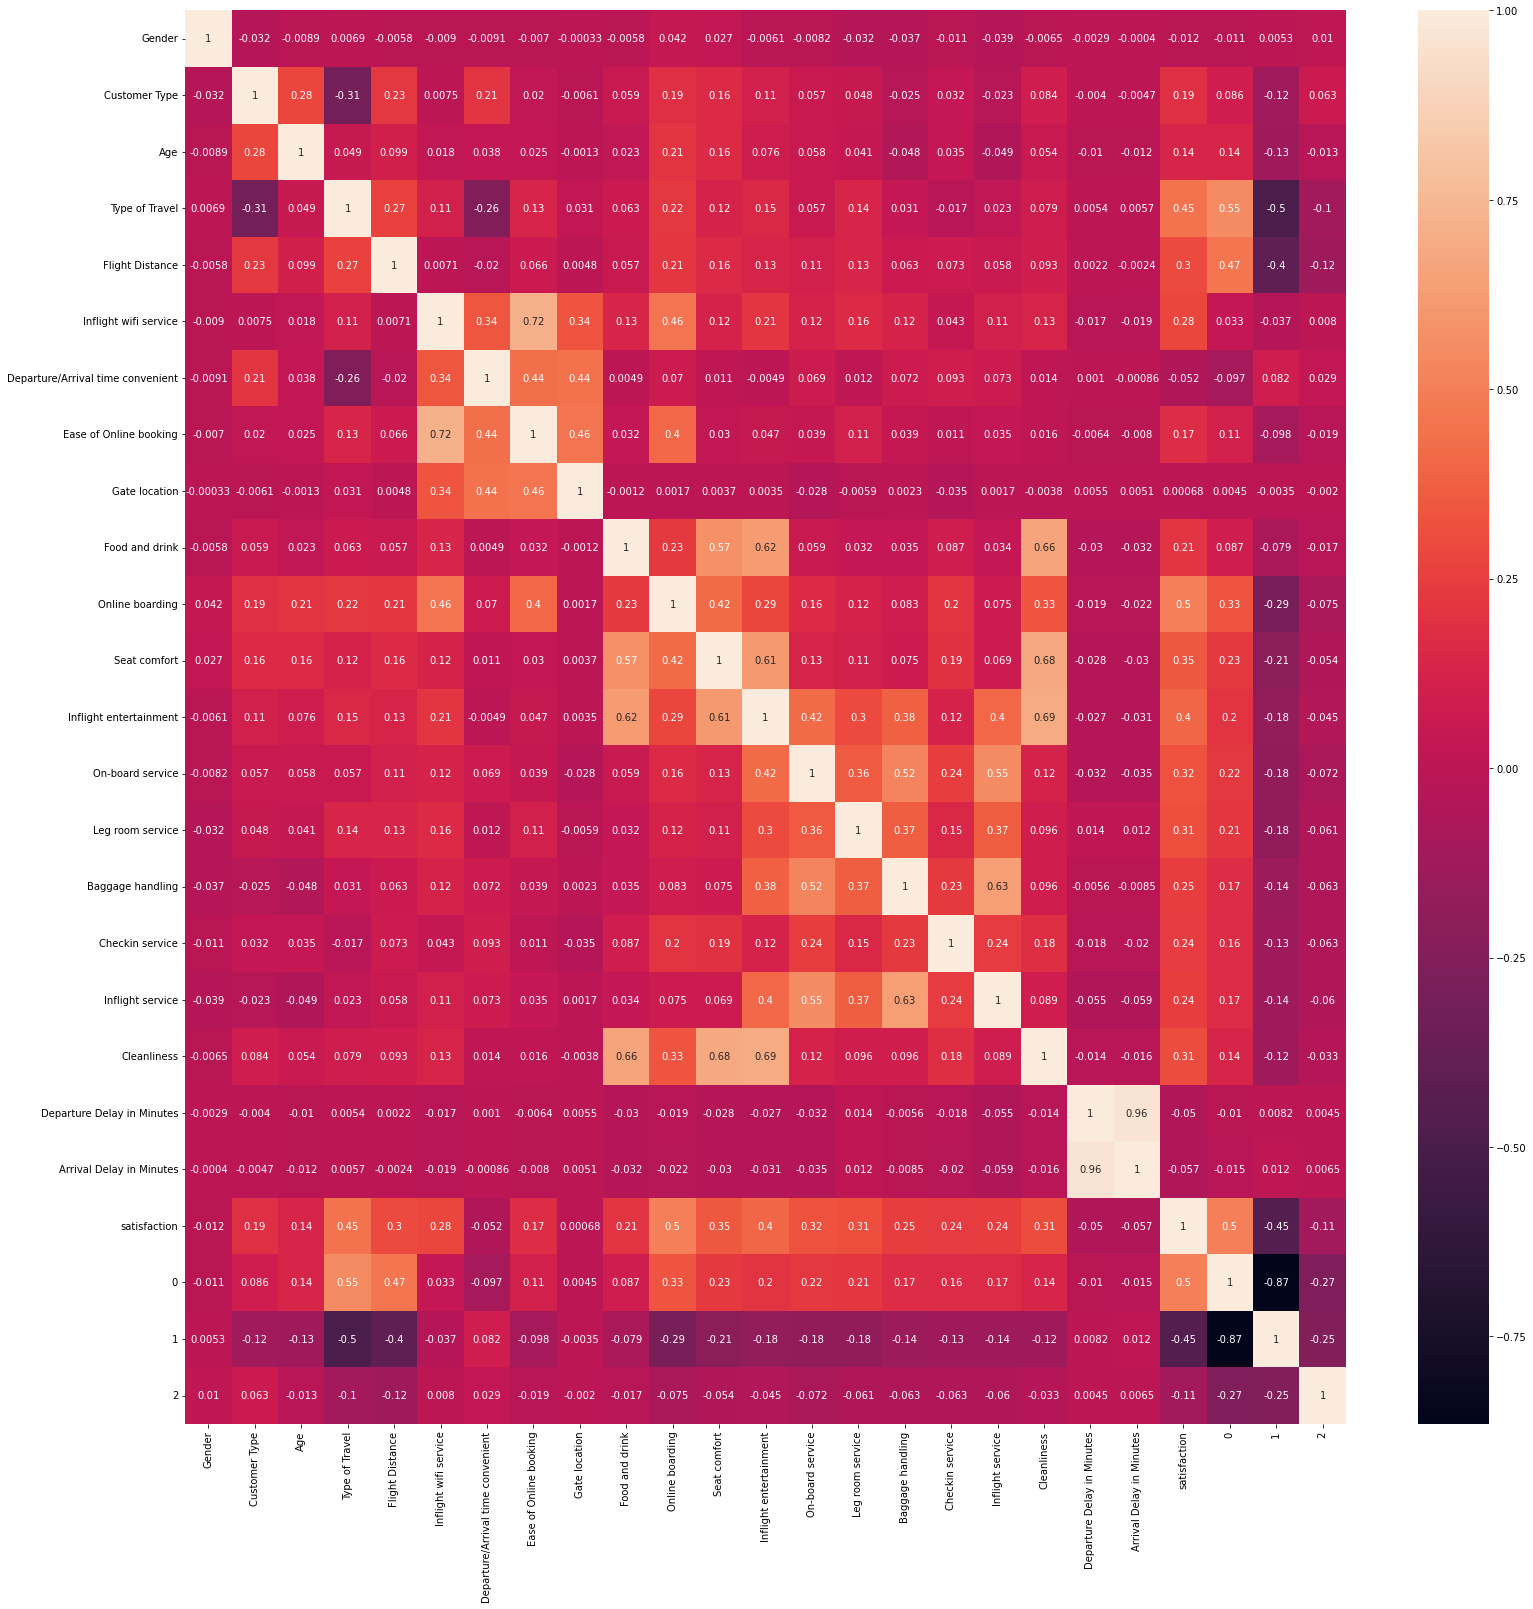

In [ ]:
# heatmap includes all variables 
_, ax = plt.subplots(figsize=(26,26))
sns.heatmap(train_df.corr(), annot=True, cmap='rocket', ax=ax)

### Train & Test Split

In [ ]:
# train data 
X_train = train_df.drop(["satisfaction"],axis=1)
y_train = train_df.satisfaction.values

# test data
X_test = test_df.drop(["satisfaction"],axis=1)
y_test = test_df.satisfaction.values

### Model 1. Decision Tree

#### Decision Tree Classifier 
* Model exploration
* Parameter tuning & affected performance
* Result analysis: visualize, interpret coefficient
* Error analysis - error samples

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz 

In [ ]:
# Building DT classifier
DT_clf = DecisionTreeClassifier()

In [ ]:
# Training 
DT_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
# Evaluating the RF classifier on test data
accuracy = DT_clf.score(X_test,y_test)
print("DecisionTreeClassifier: ", round(accuracy,4))

DecisionTreeClassifier:  0.9479


##### Parameter Tuning 
- random state
- max_depth
- min_samples_split

##### Decide on random state

In [ ]:
# Setting parameters 
param_rs = {
    'criterion' : 'entropy',
    'max_depth' : None, # default 
    'min_samples_split' : 2, # default
    'random_state' : 42
}

In [ ]:
DT_clf_rs = DecisionTreeClassifier(**param_rs)

DT_clf_rs.fit(X_train, y_train) 
DT_clf_rs.score(X_train, y_train) 

accuracy_rs = DT_clf_rs.score(X_test, y_test)
print("DecisionTreeClassifier: ", round(accuracy_rs,4))

DecisionTreeClassifier:  0.9506


In [ ]:
# model with random state sets as 4 produces a higher accuracy than the model with default 'none' random state 
print("Model after parameter tuning has a higher accuracy: ", accuracy_rs > accuracy)

Model after parameter tuning has a higher accuracy:  True


##### Decide on max_depth

In [ ]:
param_md = {
    'criterion' : 'entropy',
    'max_depth' : 20,  
    'min_samples_split' : 2, # default
    'random_state' :None # default
}

In [ ]:
DT_clf_md = DecisionTreeClassifier(**param_md)

DT_clf_md.fit(X_train, y_train) 
DT_clf_md.score(X_train, y_train) 

accuracy_md = DT_clf_md.score(X_test, y_test)
print("DecisionTreeClassifier changed max depth: ", round(accuracy_md,4))

DecisionTreeClassifier changed max depth:  0.9537


In [ ]:
# model with max depth sets as 10 produces a slightly lower accuracy than the model with default max depth setting 
print("Model after parameter tuning has a higher accuracy: ", accuracy_md > accuracy)

Model after parameter tuning has a higher accuracy:  True


##### Decide on min_samples_split

In [ ]:
param_ms = {
    'criterion' : 'entropy',
    'max_depth' : None,  # default
    'min_samples_split' : 4, 
    'random_state' :None #default
}

In [ ]:
DT_clf_ms = DecisionTreeClassifier(**param_ms)

DT_clf_ms.fit(X_train, y_train) 
DT_clf_ms.score(X_train, y_train) 

accuracy_ms = DT_clf_ms.score(X_test, y_test)
print("DecisionTreeClassifier changed max depth: ", round(accuracy_ms,4))

DecisionTreeClassifier changed max depth:  0.9494


In [ ]:
# model with min_sample split sets as 4 produces a slightly higher accuracy than 
# the model with default 'none' min_sample split 
print("Model after parameter tuning has a higher accuracy: ", accuracy_ms > accuracy)

Model after parameter tuning has a higher accuracy:  True


##### Model after parameter tuning

In [ ]:
param_pt = {
    'criterion' : 'entropy',
    'max_depth' : 20,  
    'min_samples_split' : 4, 
    'random_state' :42
}

In [ ]:
DT_clf_pt = DecisionTreeClassifier(**param_pt)

DT_clf_pt.fit(X_train, y_train) 
DT_clf_pt.score(X_train, y_train) 

accuracy_pt = DT_clf_pt.score(X_test, y_test)
print("DecisionTreeClassifier changed max depth: ", round(accuracy_pt,4))

DecisionTreeClassifier changed max depth:  0.953


##### Feature Importance 

In [ ]:
DT_clf_pt.score(X_train, y_train) 

0.983811980289498

In [ ]:
#predict first five instances
importances= DT_clf_pt.feature_importances_
importances

array([0.00126285, 0.04849248, 0.01976815, 0.13553913, 0.01893509,
       0.19984989, 0.00342243, 0.00258455, 0.02476107, 0.00325242,
       0.31897399, 0.01615122, 0.05214203, 0.00618903, 0.01082698,
       0.02327705, 0.0270551 , 0.01743333, 0.01003454, 0.00541924,
       0.00705809, 0.04661412, 0.00060358, 0.00035365])

In [ ]:
# Creating a dictionary of features and their importance values
feat_dict= {}
for col, val in sorted(zip(X_train.columns, importances),key=lambda x:x[1],reverse=True):
  feat_dict[col]=val

In [ ]:
# Structuring these importance values into dataframe
feat_df = pd.DataFrame({'Feature':feat_dict.keys(),'Importance':feat_dict.values()})

In [ ]:
feat_df

,Feature,Importance
0,Online boarding,0.318974
1,Inflight wifi service,0.199850
2,Type of Travel,0.135539
3,Inflight entertainment,0.052142
4,Customer Type,0.048492
5,0,0.046614
6,Checkin service,0.027055
7,Gate location,0.024761
8,Baggage handling,0.023277
9,Age,0.019768


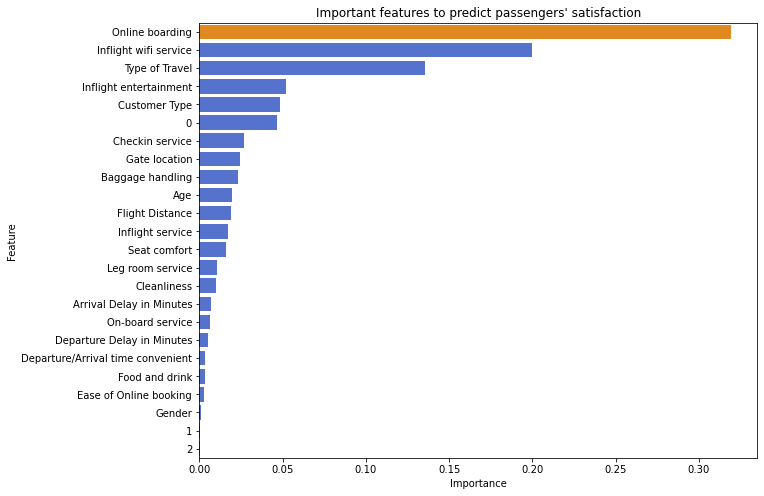

In [ ]:
# Plotting using 
values = feat_df.Importance    
idx = feat_df.Feature
plt.figure(figsize=(10,8))
clrs = ['royalblue' if (x < max(values)) else 'darkorange' for x in values ]
sns.barplot(y=idx,x=values,palette=clrs).set(title="Important features to predict passengers' satisfaction")
plt.show()

##### Visualize the decision tree

In [ ]:
from sklearn import tree
import graphviz 

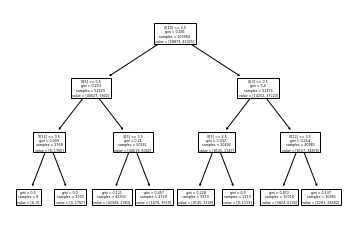

In [ ]:
# Taking a long time to plot since the max_depth is 10 
# Demonstrate the decision tree with max_depth equals 3
DT_clf_max = DecisionTreeClassifier(max_depth = 3)

DT_clf_max.fit(X_train, y_train) 
DT_clf_max.score(X_train, y_train) 

tree_graph = tree.plot_tree(DT_clf_max)

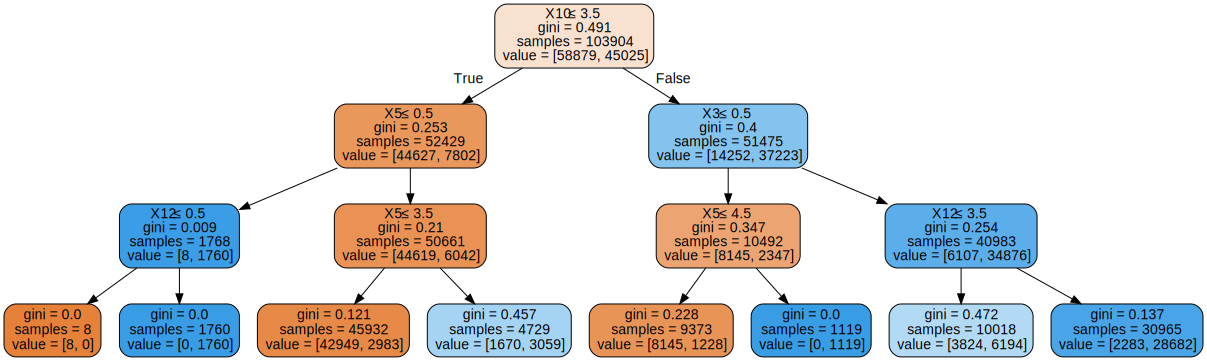

In [ ]:
dot_data = tree.export_graphviz(DT_clf_max, out_file=None, 
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

#####  Manually Analysing Classifier errors

In [ ]:
# Predict the Test set results
y_pred_en = DT_clf_pt.predict(X_test)

In [ ]:
y_pred_train_en = DT_clf_pt.predict(X_train)

y_pred_train_en

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
# no signs of overfitting and same score as we calculated before 
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Model accuracy score with criterion entropy: 0.9530
Training-set accuracy score: 0.9838


Confusion matrix

 [[14074   499]
 [  721 10682]]


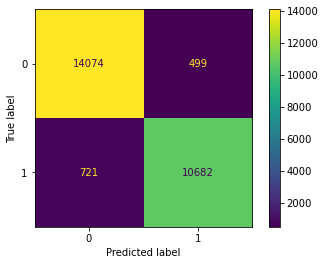

In [ ]:
CM = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', CM)
disp=ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=DT_clf_pt.classes_)
disp.plot()
plt.show()

In [ ]:
print("1218 incorrect prediction instances; (707+511)/25976 accounts for the remaining of the 0.9531 accuracy score.")

1218 incorrect prediction instances; (707+511)/25976 accounts for the remaining of the 0.9531 accuracy score.


### Model 2: Random Forest

* Model exploration
* Parameter tuning & affected performance
* Result analysis: visualize, interpret coefficient
* Error analysis - error samples

#### Build a Model

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
#Build Random Forest Classifier - base classifier
RF_clf = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)

In [90]:
#Training
RF_clf.fit(X_train, y_train) 

RandomForestClassifier(criterion='entropy', random_state=0)

In [91]:
#Training accuracy
RF_clf.score(X_train, y_train) 

1.0

In [92]:
#Evaluate the RF classifier on test data
accuracy_RF=RF_clf.score(X_test, y_test)
accuracy_RF

0.9622343701878657

#### Parameter Tuning
##### : n_estimators, max_depth, min_samples_split, oob_score

##### 1. Decide on n_estimators

In [93]:
#Explore more parameters options
#Reference of How to make use of dictionary here
# https://www.kaggle.com/code/chandrimad31/flight-passenger-satisfaction-eda-and-prediction

#change only n_estimators: 100 to 3
parameters_2 = {
    'criterion' : 'entropy',
    'n_estimators' : 3, #default = 100
    'max_depth' : None, #default,
    'min_samples_split' : 2, #default = 2
    'random_state' : 0
}

In [94]:
#make new classifier with more parameters
RF_clf_2 = RandomForestClassifier(**parameters_2)

RF_clf_2.fit(X_train, y_train) 
RF_clf_2.score(X_train, y_train) 

accuracy_RF_2 = RF_clf_2.score(X_test, y_test)
accuracy_RF_2

0.9478749615029258

In [95]:
#model with n_estimators = 100 has higher score than n_estimators = 50
accuracy_RF > accuracy_RF_2

True

##### 2. Decide on max_depth

In [96]:
#change only max_depth: None -> 3
parameters_3 = {
    'criterion' : 'entropy',
    'n_estimators' : 100,
    'max_depth' : 3, #default = "None"
    'min_samples_split' : 2, #default
    'random_state' : 0
}

In [97]:
#make new classifier with more parameters
RF_clf_3 = RandomForestClassifier(**parameters_3)

RF_clf_3.fit(X_train, y_train) 
RF_clf_3.score(X_train, y_train) 

accuracy_RF_3 = RF_clf_3.score(X_test, y_test)
accuracy_RF_3

0.8846242685555897

In [98]:
#Limiting the max_depth significantly decreases accuracy score
accuracy_RF_2 > accuracy_RF_3

True

##### 3. Decide on min_samples_split

In [99]:
#change only min_samples_split
parameters_4 = {
    'criterion' : 'entropy',
    'n_estimators' : 100,
    'max_depth' : None, #default
    'min_samples_split' : 4, #default = 2
    'random_state' : 0
}

In [100]:
#make new classifier with more parameters
RF_clf_4 = RandomForestClassifier(**parameters_4)

RF_clf_4.fit(X_train, y_train) 
RF_clf_4.score(X_train, y_train) 

accuracy_RF_4 = RF_clf_4.score(X_test, y_test)
accuracy_RF_4

0.9620803818909763

In [101]:
#Still, the first model with the default setting is the best among the cases that tried
#But it is evident that manual comparison is not effective at all
accuracy_RF > accuracy_RF_4

True

##### 4. Decide on oob_score
oob_score: whether to use out-of-bas samples to esimate the generalizations core

In [102]:
#change only min_samples_split
parameters_5 = {
    'criterion' : 'entropy',
    'n_estimators' : 100,
    'max_depth' : None, #default
    'min_samples_split' : 4, #default
    'random_state' : 0,
    'bootstrap': True,
    'oob_score': True
}

In [103]:
#make new classifier with more parameters
RF_clf_5 = RandomForestClassifier(**parameters_5)

RF_clf_5.fit(X_train, y_train) 
RF_clf_5.score(X_train, y_train) 

accuracy_RF_5 = RF_clf_5.score(X_test, y_test)
accuracy_RF_5

0.9620803818909763

In [104]:
#The first model with the default setting is the best among the cases that tried
accuracy_RF > accuracy_RF_5

True

In [105]:
#score using an out-of-bag estimate
RF_clf_5.oob_score_

0.9606271173390822

#### Result analysis
##### 1. Coefficients interpretation
- Probability distribution

In [106]:
#check the score of the base classifier again
RF_clf.score(X_test, y_test)

0.9622343701878657

In [107]:
RF_clf.classes_

array([0, 1])

In [108]:
#predict first five instances
RF_clf.predict(X_test[:5])

array([1, 1, 0, 1, 0])

In [109]:
#Probability distribution for every sample
RF_clf.predict_proba(X_test[:5])

array([[0.02, 0.98],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.8 , 0.2 ]])

* Interpretation : The first sample has a probability of 5% to belong to class '0' and 95% probability to belong to class '1'

- Feature importances - Feature importances are provided by the fitted attribute feature_importances_ and they are computed as the mean and standard deviation of accumulation of the impurity decrease within each tree.
(Source: https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html)

In [110]:
#extract importances of the features
#from random forest, we extract 'feature importances' from the group of decision trees

importances= RF_clf.feature_importances_
importances

array([0.00530626, 0.03472775, 0.03817159, 0.07714171, 0.0350489 ,
       0.1518783 , 0.01853748, 0.0443004 , 0.01788295, 0.01339204,
       0.153231  , 0.03840158, 0.04946783, 0.03119113, 0.04289225,
       0.0254007 , 0.02590448, 0.02477542, 0.02516053, 0.01341703,
       0.01525598, 0.06838111, 0.04628819, 0.00384539])

In [111]:
#How to sort feature importance values
#reference: https://vitalflux.com/feature-importance-random-forest-classifier-python/
import numpy as np
sorted_importances = np.argsort(importances)[::-1]
sorted_importances

array([10,  5,  3, 21, 12, 22,  7, 14, 11,  2,  4,  1, 13, 16, 15, 18, 17,
        6,  8, 20, 19,  9,  0, 23])

In [112]:
# features_name = np.array(X_train.columns.tolist())
feature = X_train.columns
feature

Index([                           'Gender',
                           'Customer Type',
                                     'Age',
                          'Type of Travel',
                         'Flight Distance',
                   'Inflight wifi service',
       'Departure/Arrival time convenient',
                  'Ease of Online booking',
                           'Gate location',
                          'Food and drink',
                         'Online boarding',
                            'Seat comfort',
                  'Inflight entertainment',
                        'On-board service',
                        'Leg room service',
                        'Baggage handling',
                         'Checkin service',
                        'Inflight service',
                             'Cleanliness',
              'Departure Delay in Minutes',
                'Arrival Delay in Minutes',
                                         0,
                                

In [113]:
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feature[sorted_importances[f]],
                            importances[sorted_importances[f]]))

 1) Online boarding                0.153231
 2) Inflight wifi service          0.151878
 3) Type of Travel                 0.077142
 4) 0                              0.068381
 5) Inflight entertainment         0.049468
 6) 1                              0.046288
 7) Ease of Online booking         0.044300
 8) Leg room service               0.042892
 9) Seat comfort                   0.038402
10) Age                            0.038172
11) Flight Distance                0.035049
12) Customer Type                  0.034728
13) On-board service               0.031191
14) Checkin service                0.025904
15) Baggage handling               0.025401
16) Cleanliness                    0.025161
17) Inflight service               0.024775
18) Departure/Arrival time convenient 0.018537
19) Gate location                  0.017883
20) Arrival Delay in Minutes       0.015256
21) Departure Delay in Minutes     0.013417
22) Food and drink                 0.013392
23) Gender                   

In [114]:
# Creating a dictionary of features and their importance values
feat_dict= {}
for col, val in sorted(zip(X_train.columns, importances),key=lambda x:x[1],reverse=True):
  feat_dict[col]=val


In [115]:
# Structuring these importance values into dataframe
feat_df = pd.DataFrame({'Feature':feat_dict.keys(),'Importance':feat_dict.values()})

In [116]:
#to remind: 0, 1, 2 are columns transformed with one-hot encoder
#0: business, 1: Eco, 2: Eco-plus
feat_df

,Feature,Importance
0,Online boarding,0.153231
1,Inflight wifi service,0.151878
2,Type of Travel,0.077142
3,0,0.068381
4,Inflight entertainment,0.049468
5,1,0.046288
6,Ease of Online booking,0.044300
7,Leg room service,0.042892
8,Seat comfort,0.038402
9,Age,0.038172


##### 2. Visualization of the result analysis

Text(0, 0.5, 'Feature Names')

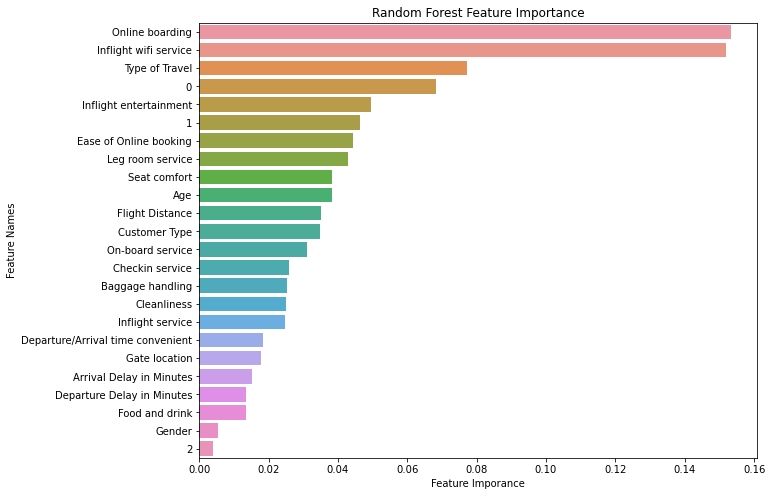

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.barplot(x=feat_df['Importance'], y=feat_df['Feature'])
plt.title("Random Forest Feature Importance")
plt.xlabel("Feature Imporance")
plt.ylabel("Feature Names")

#Reference for plot visualization
#https://www.analyseup.com/learn-python-for-data-science/python-random-forest-feature-importance-plot.html

##### Interpretation
* Following are the elements that present strong relationship with airline passenger satisfaction

(1) Online boarding (Satisfaction of the service) (0-5) 

(2) Availability of wifi service (0-5)

(3) Type of travel: business (0) vs personal (1)

(4) '0', '1', Whether seat is a Business class (0) or Eco (1)

(5) Inflight entertainment (0-5)


In [118]:
# Visualization of the base random forest model
#I chose to visualize RF_clf_3 (not the base model) due to the computing issue and visiblity of the graph
from sklearn.tree import export_graphviz
from sklearn import tree
import graphviz 
    

In [119]:
RF_clf_3.estimators_[0]

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='auto',
                       random_state=209652396)

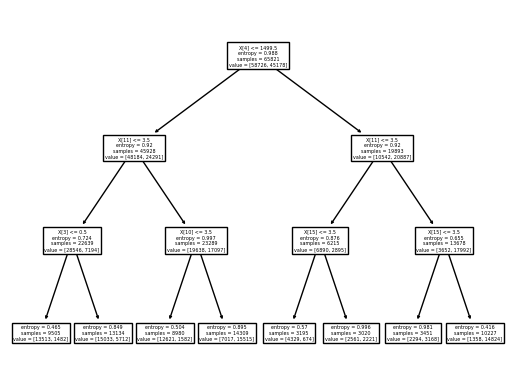

In [ ]:
# Visualize with RF_clf_3 (the simplest one where I limited the maximum depth)
tree_graph = tree.plot_tree(RF_clf_3.estimators_[0])

In [120]:
#export graphviz to save as png
dot_data = export_graphviz(RF_clf_3.estimators_[0], out_file='rf_3_estimators_0.dot',
                feature_names = feature,
                rounded = True, precision = 1)

In [121]:
graph = graphviz.Source(dot_data)  

In [127]:
#how to render from dot file to png
# reference: https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
import pydot
(graph, ) = pydot.graph_from_dot_file('rf_3_estimators_0.dot')

In [128]:
graph.write_png('rf_3_estimators_0.png')

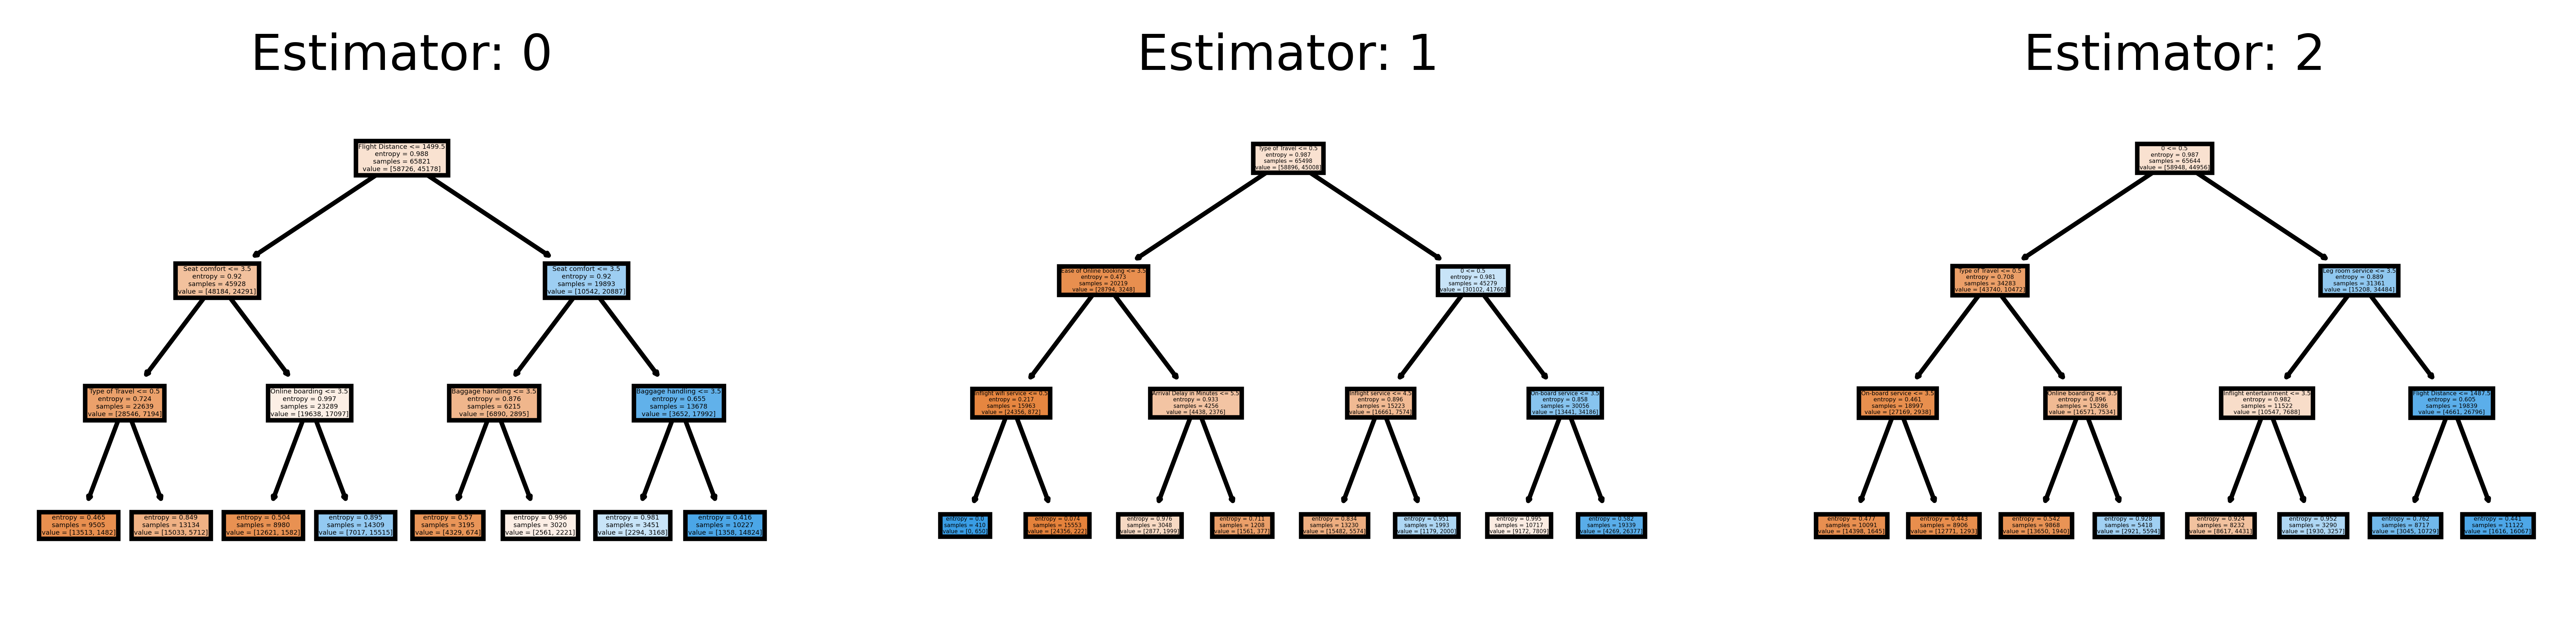

In [129]:
#Visualizing random forest (Just picked the first 4 decision trees)
#reference; https://stackoverflow.com/questions/40155128/plot-trees-for-a-random-forest-in-python-with-scikit-learn
fig, axes = plt.subplots(nrows = 1,ncols = 3,figsize = (10,2), dpi=900)
for index in range(0, 3):
    tree.plot_tree(RF_clf_3.estimators_[index],
                   feature_names = feature, 
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig('rf_3trees.png')

#### Error analysis 
: Exploring error samples

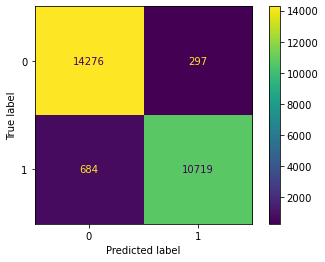

In [130]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

#predicted value for the test set
y_pred = RF_clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=RF_clf.classes_)
# ploting with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RF_clf.classes_)
disp.plot()
# showing the matrix
plt.show()

In [134]:
#same score as the one we calcaulted above
accuracy_score(y_test, y_pred)

0.9622343701878657

In [132]:
X_test

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,0,1,2
0,1,1,52,1,160,5,4,3,4,3,...,5,5,2,5,5,50,44.0,0.0,1.0,0.0
1,1,1,36,1,2863,1,1,3,1,5,...,4,4,3,4,5,0,0.0,1.0,0.0,0.0
2,0,0,20,1,192,2,0,2,4,2,...,1,3,2,2,2,0,0.0,0.0,1.0,0.0
3,0,1,44,1,3377,0,0,0,2,3,...,1,1,3,1,4,0,6.0,1.0,0.0,0.0
4,1,1,49,1,1182,2,3,4,3,4,...,2,2,4,2,4,0,20.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,0,0,34,1,526,3,3,3,1,4,...,2,4,4,5,4,0,0.0,1.0,0.0,0.0
25972,0,1,23,1,646,4,4,4,4,4,...,5,5,5,5,4,0,0.0,1.0,0.0,0.0
25973,1,1,17,0,828,2,5,1,5,2,...,3,4,5,4,2,0,0.0,0.0,1.0,0.0
25974,0,1,14,1,1127,3,3,3,3,4,...,2,5,4,5,4,0,0.0,1.0,0.0,0.0


In [133]:
#make into one dimensional numpy array
#code reference: https://stackoverflow.com/questions/60398485/convert-pandas-dataframe-to-one-numpy-array
y_test_numpy = y_test.reshape(-1)
y_test_numpy

array([1, 1, 0, ..., 0, 1, 0])

In [136]:
compare_target = pd.DataFrame({'satisfaction_true': y_test_numpy, 'satisfaction_predicted': y_pred})

In [137]:
X_test = X_test.reset_index(drop=True)

In [138]:
X_test.head()

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,0,1,2
0,1,1,52,1,160,5,4,3,4,3,...,5,5,2,5,5,50,44.0,0.0,1.0,0.0
1,1,1,36,1,2863,1,1,3,1,5,...,4,4,3,4,5,0,0.0,1.0,0.0,0.0
2,0,0,20,1,192,2,0,2,4,2,...,1,3,2,2,2,0,0.0,0.0,1.0,0.0
3,0,1,44,1,3377,0,0,0,2,3,...,1,1,3,1,4,0,6.0,1.0,0.0,0.0
4,1,1,49,1,1182,2,3,4,3,4,...,2,2,4,2,4,0,20.0,0.0,1.0,0.0


In [139]:
result=pd.concat([X_test, compare_target], axis=1)

In [140]:
result.head()

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,0,1,2,satisfaction_true,satisfaction_predicted
0,1,1,52,1,160,5,4,3,4,3,...,2,5,5,50,44.0,0.0,1.0,0.0,1,1
1,1,1,36,1,2863,1,1,3,1,5,...,3,4,5,0,0.0,1.0,0.0,0.0,1,1
2,0,0,20,1,192,2,0,2,4,2,...,2,2,2,0,0.0,0.0,1.0,0.0,0,0
3,0,1,44,1,3377,0,0,0,2,3,...,3,1,4,0,6.0,1.0,0.0,0.0,1,1
4,1,1,49,1,1182,2,3,4,3,4,...,4,2,4,0,20.0,0.0,1.0,0.0,1,0


In [141]:
error_sample = result[result['satisfaction_true'] != result['satisfaction_predicted']]

In [142]:
error_sample

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,0,1,2,satisfaction_true,satisfaction_predicted
4,1,1,49,1,1182,2,3,4,3,4,...,4,2,4,0,20.0,0.0,1.0,0.0,1,0
29,0,1,51,1,235,4,3,3,3,4,...,3,4,4,0,0.0,0.0,1.0,0.0,0,1
38,1,0,32,1,802,4,4,4,2,2,...,3,5,2,0,10.0,1.0,0.0,0.0,0,1
102,1,1,38,0,293,4,4,4,4,5,...,4,4,5,5,0.0,0.0,1.0,0.0,1,0
133,0,0,39,1,546,4,4,4,4,2,...,3,4,2,93,88.0,1.0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25930,1,1,30,1,2762,4,2,2,2,4,...,4,3,4,0,0.0,0.0,1.0,0.0,1,0
25945,0,1,29,1,1069,3,1,1,1,3,...,3,1,3,20,32.0,0.0,1.0,0.0,1,0
25954,1,1,29,1,2248,4,4,4,4,4,...,3,4,4,1,0.0,1.0,0.0,0.0,0,1
25960,1,0,23,1,447,4,0,4,3,1,...,5,4,1,0,0.0,0.0,1.0,0.0,0,1


##### Exploration on error sample
- Similar exploration attempted in the preprocessing stage
- Focus on the features that turns out to have more explanatory power with the target value (satisfaction level). That is, 

In [143]:
error_sample.describe()

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,0,1,2,satisfaction_true,satisfaction_predicted
count,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,...,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000
mean,0.527013,0.691131,37.695209,0.669725,844.491335,3.728848,3.217125,3.496432,2.914373,3.168196,...,3.175331,3.558614,3.087666,12.815494,12.973723,0.295617,0.628950,0.075433,0.697248,0.302752
std,0.499524,0.462262,15.038382,0.470552,728.911890,0.685025,1.448698,1.086671,1.244091,1.318335,...,1.266460,1.165788,1.303238,34.442048,34.740663,0.456552,0.483332,0.264224,0.459683,0.459683
min,0.000000,0.000000,7.000000,0.000000,67.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,25.000000,0.000000,337.000000,4.000000,2.000000,3.000000,2.000000,2.000000,...,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,38.000000,1.000000,605.000000,4.000000,4.000000,4.000000,3.000000,3.000000,...,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,48.000000,1.000000,1067.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,8.000000,8.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,80.000000,1.000000,3932.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,332.000000,311.000000,1.000000,1.000000,1.000000,1.000000,1.000000


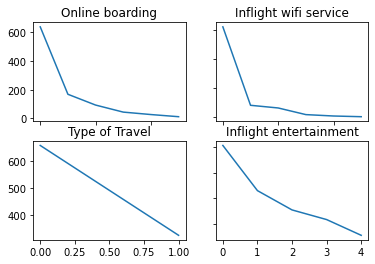

In [144]:
#plot display style reference
#https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html

fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(error_sample['Online boarding'].value_counts().values)
axs[0, 0].set_title('Online boarding')
axs[0, 1].plot(error_sample['Inflight wifi service'].value_counts().values)
axs[0, 1].set_title('Inflight wifi service')
axs[1, 0].plot(error_sample['Type of Travel'].value_counts().values)
axs[1, 0].set_title('Type of Travel')
axs[1, 1].plot(error_sample['Inflight entertainment'].value_counts().values)
axs[1, 1].set_title('Inflight entertainment')

for ax in axs.flat:
    ax.label_outer()

Text(0.5, 1.0, 'Dissatisfied customers')

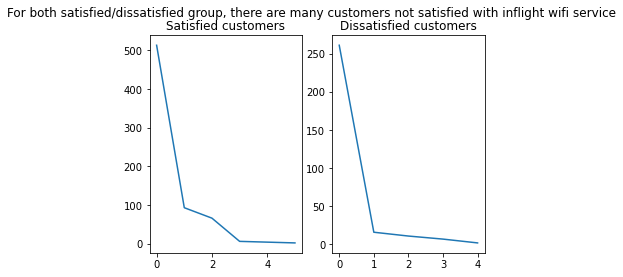

In [145]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('For both satisfied/dissatisfied group, there are many customers not satisfied with inflight wifi service')
ax1.plot(error_sample[error_sample['satisfaction_true']==1]['Inflight wifi service'] .value_counts().values)
ax1.set_title ('Satisfied customers')
ax2.plot(error_sample[error_sample['satisfaction_true']==0]['Inflight wifi service'] .value_counts().values)
ax2.set_title ('Dissatisfied customers')

##### Possible reasoning of the false prediction, applicable to both DT and Random Forest

Above is the distribution plot of 4 features that were analyzed to have a strong relationship with customer satisfaction. That is, the Random Forest model that I chose here concludes that those who expressed more satisfaction with (1) Online boarding service (coded 0-5), (2) Inflight wifi service (coded 0-5), (3) Type of travel (Business (0) vs Personal(1)), and (4) Inflight entertainment (0-5) are likely to be satisfied customers.

It could be understood that these four features are given substantial weights when calculating the probability of satisfaction (binary target variable). However, it could be erroneous for those cases that does not match the general trend. 
Specifically, some customers are unsatisfied with their (1) Online boarding service and (2) Inflight wifi service. Because these two factors are considered critically for predicting satisfaction, the Random Forest mechanism likely overlooks the possibility of customers being satisfied despite their dissatisfaction with either the features. We can check the existence of those types of customers on the above plot and can further investigate it.

However, it should also be noted that the Random Forest model did correct the weight given to the model when compared to the decision tree model. In the Decision Tree model, (1) Online boarding service was given the importance of **0.318974**, which is closely twice the importance of the second significant feature (2) Inflight wifi service. RF corrected it to **0.153231**, which is a level similar to (2) Inflight wifi. Thus we can confirm that a higher performance score of RT comes from more careful classification via correction on the importance given to features.

### Model 3: Logistic Regression

* Model exploration
* Parameter tuning & affected performance
* Result analysis: visualize, interpret coefficient
* Error analysis - error samples

##### Build a model
* Fit a LogisticRegression classifier
* Perform k-fold cross validation to evaluate model overall performance 

In [ ]:
from sklearn.linear_model import LogisticRegression

In [149]:
# building logistic regression model
logreg = LogisticRegression()

In [150]:
# training logistic regression model
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)

In [151]:
# Evaluating the logistic regression model on test data
accuracy = logreg.score(X_test,y_test)
print("Logistic Regression Model: ", round(accuracy,4))

Logistic Regression Model:  0.8016


##### Parameter Tuning

##### Decide on Random State

In [152]:
# Setting parameters 
param_rs = {
    'C' : 1.0, # default
    'max_iter' : 100, # default 
    'class_weight' : None, # default
    'random_state' : 42
}

In [153]:
logreg_rs = LogisticRegression(**param_rs)

logreg_rs.fit(X_train, y_train) 
logreg_rs.score(X_train, y_train) 

accuracy_rs = logreg_rs.score(X_test, y_test)
print("Logistic Regression Model: ", round(accuracy_rs,4))

Logistic Regression Model:  0.8016


In [154]:
# model with random state sets as 42 produces a higher accuracy than the model with default 'none' random state 
print("Model after parameter tuning has a higher accuracy: ", accuracy_rs > accuracy)

Model after parameter tuning has a higher accuracy:  False


##### Decide on C

In [155]:
# Setting parameters 
param_C = {
    'C' : 6000, # default
    'max_iter' : 100, # default 
    'class_weight' : None, # default
    'random_state' : 42
}

In [157]:
logreg_C = LogisticRegression(**param_C)

logreg_C.fit(X_train, y_train) 
logreg_C.score(X_train, y_train) 

accuracy_C = logreg_C.score(X_test, y_test)
print("Logistic Regression Model changed C: ", round(accuracy_C,4))

Logistic Regression Model changed C:  0.804


In [158]:
# model with random state sets as 42 produces a higher accuracy than the model with default 'none' random state 
print("Model after parameter tuning has a higher accuracy: ", accuracy_rs > accuracy)

Model after parameter tuning has a higher accuracy:  False


##### Decide on max_iter

In [159]:
# Setting parameters 
param_mi = {
    'C' : 1.0, # default
    'max_iter' : 10000, 
    'class_weight' : None, # default
    'random_state' : 0
}

In [160]:
logreg_mi = LogisticRegression(**param_mi)

logreg_mi.fit(X_train, y_train) 
logreg_mi.score(X_train, y_train) 

accuracy_mi = logreg_mi.score(X_test, y_test)
print("Logistic Regression Model: ", round(accuracy_mi,4))

Logistic Regression Model:  0.8713


In [161]:
# model with max iteration sets as 10000, the larger the max iteration times, the higher the score; and LR is also fast to compute
print("Model after parameter tuning has a higher accuracy: ", accuracy_mi > accuracy)

Model after parameter tuning has a higher accuracy:  True


##### Decide on class_weight

In [162]:
# Setting parameters 
param_cw = {
    'C' : 1.0, # default
    'max_iter' : 100, # default 
    'class_weight' : 'balanced' , 
    'random_state' : 0
}

In [163]:
logreg_cw = LogisticRegression(**param_cw)

logreg_cw.fit(X_train, y_train) 
logreg_cw.score(X_train, y_train) 

accuracy_cw = logreg_cw.score(X_test, y_test)
print("Logistic Regression Model: ", round(accuracy_cw,4))

Logistic Regression Model:  0.7894


In [ ]:
# model with class weight sets as balanced produces a worse accuracy than the model with default 'none', because there is no imbalance between classification
print("Model after parameter tuning has a higher accuracy: ", accuracy_cw > accuracy)

##### Model after parameter tuning

In [181]:
# Setting parameters 
param_pt = {
    'C' : 10, # default
    'max_iter' : 10000, 
    'class_weight' : None , 
    'random_state' : 0
}

In [183]:
logreg_pt = LogisticRegression(**param_pt)

logreg_pt.fit(X_train, y_train) 
logreg_pt.score(X_train, y_train) 

accuracy_pt = logreg_pt.score(X_test, y_test)
print("Logistic Regression Model: ", round(accuracy_pt,4))

Logistic Regression Model:  0.8717


#### Result Analysis: 
1. Coefficient Analysis

In [184]:
# get Correlation Coefficient for each feature
coeff_df = pd.DataFrame(train_df.columns.delete(-4))
coeff_df.columns = ['Features']
coeff_df["Coefficient"] = pd.Series(logreg.coef_[0])

# preview
coeff_df.sort_values(by='Coefficient', inplace=True)
coeff_df

,Features,Coefficient
22,1,-0.672280
6,Departure/Arrival time convenient,-0.377176
9,Food and drink,-0.336948
8,Gate location,-0.334375
17,Inflight service,-0.201660
15,Baggage handling,-0.169876
0,Gender,-0.167461
23,2,-0.088879
18,Cleanliness,-0.061196
16,Checkin service,-0.044009


In [185]:
features_name = np.array(X_train.columns.tolist())
features_name

array(['Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding',
       'Seat comfort', 'Inflight entertainment', 'On-board service',
       'Leg room service', 'Baggage handling', 'Checkin service',
       'Inflight service', 'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes', '0', '1', '2'], dtype='<U33')

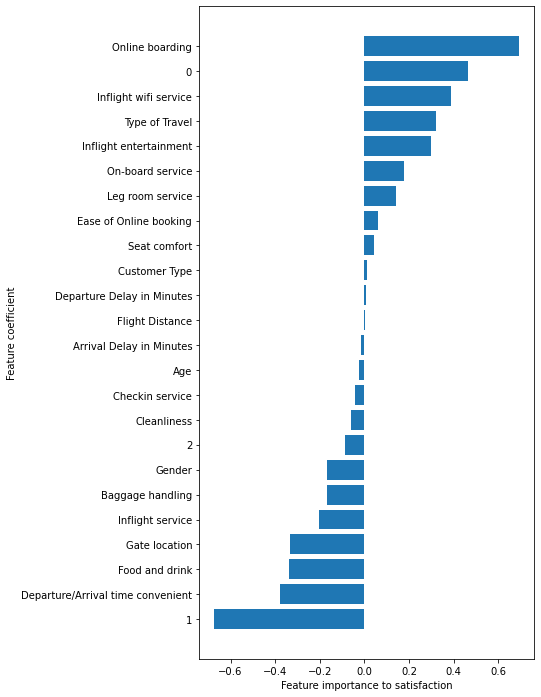

In [186]:
fig, ax = plt.subplots(figsize=(6,12))
l = len(features_name)
ax.barh(range(l), coeff_df.Coefficient)
ax.set_xlabel("Feature importance to satisfaction")
ax.set_ylabel("Feature coefficient")
ax.set_yticks(range(l))
y_lb = ax.set_yticklabels(coeff_df.Features)

Online boarding, **business class**, and inflight wifi service are the top three important factors that lead to passengers' satisfaction, while **eco class**, departure/arrival time convenient, and food and drink services are the three factors that would reduce passengers' satisfaction.

2. Error Analysis

In [187]:
# predict class labels for each test sample
y_pred_en = logreg_pt.predict(X_test)

In [188]:
logreg_pt.predict_proba(X_test)

array([[0.06374489, 0.93625511],
       [0.1290789 , 0.8709211 ],
       [0.97016137, 0.02983863],
       ...,
       [0.96851176, 0.03148824],
       [0.09261009, 0.90738991],
       [0.99877723, 0.00122277]])

In [189]:
y_pred_train_en = logreg_pt.predict(X_train)

y_pred_train_en

array([0, 0, 1, ..., 0, 0, 0])

In [190]:
# no signs of overfitting and same score as we calculated before 
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Model accuracy score: 0.8717
Training-set accuracy score: 0.8752


Confusion matrix

 [[13146  1427]
 [ 1907  9496]]


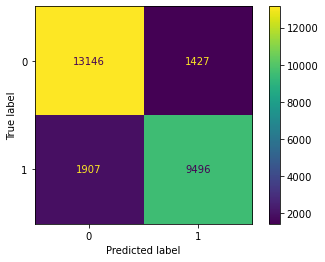

In [191]:
CM = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', CM)
disp=ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=logreg_pt.classes_)
disp.plot()
plt.show()

It has more classification errors than DT and RF. Probably because it is a simple model, the fit is not good. And it gives relatively same weight for all features.

#### Model Comparison

In [169]:
# calculating roc_auc_score shows that RF has the best performance
from sklearn.metrics import roc_auc_score
print('LR Model accuracy score: {0:0.4f}'. format(roc_auc_score(y_test, logreg_pt.predict(X_test)),4))
print('RF Model accuracy score: {0:0.4f}'. format(roc_auc_score(y_test, RF_clf.predict(X_test)),4))
print('DC Model accuracy score: {0:0.4f}'. format(roc_auc_score(y_test, DT_clf.predict(X_test)),4))

LR Model accuracy score: 0.8673
RF Model accuracy score: 0.9598
DC Model accuracy score: 0.9472
